# Imports

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

awards_players_cleaned = pd.read_csv('../data/basketballPlayoffs_cleaned/awards_players_cleaned.csv')
coaches_cleaned = pd.read_csv('../data/basketballPlayoffs_cleaned/coaches_cleaned.csv')
players_cleaned = pd.read_csv('../data/basketballPlayoffs_cleaned/players_cleaned.csv')
players_teams_cleaned = pd.read_csv('../data/basketballPlayoffs_cleaned/players_teams_cleaned.csv')
series_post_cleaned = pd.read_csv('../data/basketballPlayoffs_cleaned/series_post_cleaned.csv')
teams_cleaned = pd.read_csv('../data/basketballPlayoffs_cleaned/teams_cleaned.csv')
teams_post_cleaned = pd.read_csv('../data/basketballPlayoffs_cleaned/teams_post_cleaned.csv')

# Obtain data from only 9 years

In [17]:
awards_players_model = awards_players_cleaned[awards_players_cleaned['year'] != 10]
coaches_model = coaches_cleaned[coaches_cleaned['year'] != 10]
players_teams_model = players_teams_cleaned[players_teams_cleaned['year'] != 10]
series_post_model = series_post_cleaned[series_post_cleaned['year'] != 10]
teams_model = teams_cleaned[teams_cleaned['year'] != 10]
teams_post_model = teams_post_cleaned[teams_post_cleaned['year'] != 10]

os.makedirs('../data/basketballPlayoffs_model', exist_ok=True)

for df, name in [(awards_players_model, 'awards'), 
                 (coaches_model, 'coaches'),
                 (players_teams_model, 'players'),
                 (series_post_model, 'series'),
                 (teams_model, 'teams'),
                 (teams_post_model, 'teams_post')]:
    if df['year'].max() != 9:
        print(f"Warning: {name} contains data beyond year 9")

awards_players_model.to_csv('../data/basketballPlayoffs_model/awards_players_model.csv', index=False)
coaches_model.to_csv('../data/basketballPlayoffs_model/coaches_model.csv', index=False)
players_cleaned.to_csv('../data/basketballPlayoffs_model/players_model.csv', index=False)
players_teams_model.to_csv('../data/basketballPlayoffs_model/players_teams_model.csv', index=False)
series_post_model.to_csv('../data/basketballPlayoffs_model/series_post_model.csv', index=False)
teams_model.to_csv('../data/basketballPlayoffs_model/teams_model.csv', index=False)
teams_post_model.to_csv('../data/basketballPlayoffs_model/teams_post_model.csv', index=False)

# Overalls from only 9 years

In [18]:
players_overall_avg = players_teams_model.groupby('playerID')['OVERALL'].mean().reset_index()

players_overall_avg.rename(columns={'OVERALL': 'OVERALL_ALL_TIME'}, inplace=True)

players_overall_avg['OVERALL_ALL_TIME'] = players_overall_avg['OVERALL_ALL_TIME'].round(1)

players_overall_avg.to_csv('../data/basketballPlayoffs_model/players_overall_all_time_model.csv', index=False)

In [19]:
rookie_players = players_teams_model[players_teams_model['is_rookie'] == 1]

rookie_overall_avg = rookie_players['OVERALL'].mean().round(1)

rookie_overall_avg_df = pd.DataFrame({'rookie_overall_avg': [rookie_overall_avg]})

rookie_overall_avg_df.to_csv('../data/basketballPlayoffs_model/rookie_overall_avg_model.csv', index=False)

In [20]:
rookie_coaches = coaches_model[coaches_model['is_rookie'] == 1]

rookie_overall_coaches_avg = rookie_coaches['OVERALL'].mean().round(1)

rookie_overall_coaches_avg_df = pd.DataFrame({'rookie_overall_coaches_avg': [rookie_overall_coaches_avg]})

rookie_overall_coaches_avg_df.to_csv('../data/basketballPlayoffs_model/rookie_overall_coaches_avg_model.csv', index=False)

In [21]:
coaches_overall_avg = coaches_model.groupby('coachID')['OVERALL'].mean().reset_index()

coaches_overall_avg.rename(columns={'OVERALL': 'OVERALL_ALL_TIME'}, inplace=True)

coaches_overall_avg['OVERALL_ALL_TIME'] = coaches_overall_avg['OVERALL_ALL_TIME'].round(1)

coaches_overall_avg.to_csv('../data/basketballPlayoffs_model/coaches_overall_all_time_model.csv', index=False)

# Obtain ranks from the 10th year to compare

In [22]:
playoffs_10th_year = teams_cleaned[teams_cleaned['year'] == 10][['tmID', 'playoff']]

playoffs_10th_year.to_csv('../data/basketballPlayoffs_model/playoffs_10th_year.csv', index=False)

# Obtain teams line up and coach from the 10th year

In [23]:
coaches_model_10th_year = coaches_cleaned[coaches_cleaned['year'] == 10][['coachID', 'tmID',]]

coaches_model_10th_year.to_csv('../data/basketballPlayoffs_model/coaches_model_10th_year.csv', index=False)

In [24]:
players_model_10th_year = players_teams_cleaned[players_teams_cleaned['year'] == 10][['playerID','tmID']]

players_model_10th_year = players_model_10th_year.sort_values(by='tmID')

players_model_10th_year.to_csv('../data/basketballPlayoffs_model/players_model_10th_year.csv', index=False)

# Add overalls calculated from 9 years to the 10th year players and coach

In [25]:
players_model_10th_year = pd.read_csv('../data/basketballPlayoffs_model/players_model_10th_year.csv')
players_overall_all_time_model = pd.read_csv('../data/basketballPlayoffs_model/players_overall_all_time_model.csv')

rookie_avg = 5.6 

players_model_10th_year = players_model_10th_year.merge(
    players_overall_all_time_model[['playerID', 'OVERALL_ALL_TIME']],
    on='playerID',
    how='left'
).fillna({'OVERALL_ALL_TIME': rookie_avg})

players_model_10th_year.rename(columns={'OVERALL_ALL_TIME': 'OVERALL'}, inplace=True)

players_model_10th_year.to_csv('../data/basketballPlayoffs_model/players_model_10th_year.csv', index=False)

In [26]:
coaches_model_10th_year = pd.read_csv('../data/basketballPlayoffs_model/coaches_model_10th_year.csv')
coaches_overall_all_time_model = pd.read_csv('../data/basketballPlayoffs_model/coaches_overall_all_time_model.csv')

rookie_avg_coach = 8.9 

coaches_model_10th_year = coaches_model_10th_year.merge(
    coaches_overall_all_time_model[['coachID', 'OVERALL_ALL_TIME']],
    on='coachID',
    how='left'
).fillna({'OVERALL_ALL_TIME': rookie_avg_coach})

coaches_model_10th_year.rename(columns={'OVERALL_ALL_TIME': 'OVERALL'}, inplace=True)

coaches_model_10th_year.to_csv('../data/basketballPlayoffs_model/coaches_model_10th_year.csv', index=False)


# Given the teams players composition and their respective overalls calculate the team overall (mean of all players)

In [27]:
players_model_10th_year = pd.read_csv('../data/basketballPlayoffs_model/players_model_10th_year.csv')

team_overall = players_model_10th_year.groupby('tmID')['OVERALL'].mean().reset_index()

team_overall['overall_team'] = team_overall['OVERALL'].round(1)

team_overall = team_overall.drop(columns=['OVERALL'])

team_overall.to_csv('../data/basketballPlayoffs_model/team_overall.csv', index=False)

# Given the team coaches and their respective overalls calculate the coach overall (mean of all coaches(1 or more than 1))

In [28]:
coaches_model_10th_year = pd.read_csv('../data/basketballPlayoffs_model/coaches_model_10th_year.csv')

team_overall_coaches = coaches_model_10th_year.groupby('tmID')['OVERALL'].mean().reset_index()

team_overall_coaches['overall_team_coach'] = team_overall_coaches['OVERALL'].round(1)

team_overall_coaches = team_overall_coaches.drop(columns=['OVERALL'])

team_overall_coaches.to_csv('../data/basketballPlayoffs_model/team_overall_coaches.csv', index=False)

# Models

Preparing training data...
Preparing test data...

Model Performance:
-----------------

SVM:
Training Metrics (Years 1-9):
Training Accuracy: 73.39%
Training F1 Score: 0.79
Training Precision: 0.74
Training Recall: 0.84

Sum of probabilities: 8.00
Test Accuracy (Year 10): 62.50%
Prediction Error: 5.86

Team Predictions (1 = Playoff, 0 = No Playoff):
Team 0: Probability = 0.56, Predicted = 0, Actual = 1
Team 2: Probability = 0.55, Predicted = 0, Actual = 0
Team 4: Probability = 0.63, Predicted = 1, Actual = 0
Team 5: Probability = 0.72, Predicted = 1, Actual = 1
Team 7: Probability = 0.76, Predicted = 1, Actual = 1
Team 8: Probability = 0.62, Predicted = 1, Actual = 1
Team 10: Probability = 0.54, Predicted = 0, Actual = 0
Team 11: Probability = 0.63, Predicted = 1, Actual = 0
Team 13: Probability = 0.55, Predicted = 0, Actual = 1
Team 15: Probability = 0.59, Predicted = 1, Actual = 0
Team 16: Probability = 0.60, Predicted = 1, Actual = 1
Team 17: Probability = 0.67, Predicted = 1, Actu

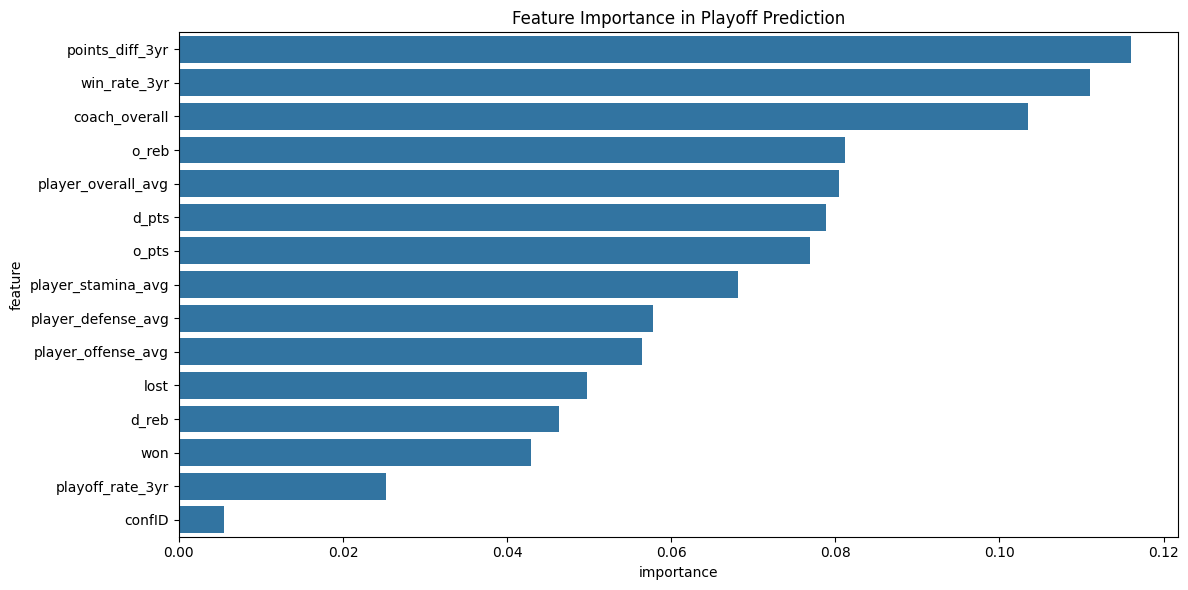

In [29]:
# Import ML libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix

def create_features_for_team(team_data, teams_history, players_teams_data, coaches_data, year):
   features = {
       'won': team_data['won'],
       'lost': team_data['lost'],
       'o_pts': team_data['o_pts'],
       'd_pts': team_data['d_pts'],
       'o_reb': team_data['o_reb'],
       'd_reb': team_data['d_reb'],
       'confID': team_data['confID']
   }
   
   # Calculate historical averages
   team_history_data = teams_history[
       (teams_history['tmID'] == team_data['tmID']) & 
       (teams_history['year'] <= year)
   ].sort_values('year')
   
   # 3-year rolling averages
   features['win_rate_3yr'] = team_history_data['won'].tail(3).mean()
   features['playoff_rate_3yr'] = team_history_data['playoff'].tail(3).mean()
   features['points_diff_3yr'] = (team_history_data['o_pts'] - team_history_data['d_pts']).tail(3).mean()
   
   # Player stats
   team_players = players_teams_data[
       (players_teams_data['year'] == year) & 
       (players_teams_data['tmID'] == team_data['tmID'])
   ]
   features['player_overall_avg'] = team_players['OVERALL'].mean()
   features['player_stamina_avg'] = team_players['overallSTAMINA'].mean()
   features['player_defense_avg'] = team_players['overallDEFENSE'].mean()
   features['player_offense_avg'] = team_players['overallOFFENSE'].mean()
   
   # Coach stats
   team_coach = coaches_data[
       (coaches_data['year'] == year) & 
       (coaches_data['tmID'] == team_data['tmID'])
   ]
   features['coach_overall'] = team_coach['OVERALL'].mean() if len(team_coach) > 0 else 0
   
   return list(features.values())

# Prepare training data (years 1-9)
print("Preparing training data...")
X_train = []
y_train = []

for year in range(1, 10):
   current_year_teams = teams_model[teams_model['year'] == year]
   next_year_teams = teams_model[teams_model['year'] == year + 1]
   
   for _, team in current_year_teams.iterrows():
       if team['tmID'] in next_year_teams['tmID'].values:
           features = create_features_for_team(team, teams_model, players_teams_model, coaches_model, year)
           X_train.append(features)
           
           next_year_playoff = next_year_teams[next_year_teams['tmID'] == team['tmID']]['playoff'].iloc[0]
           y_train.append(next_year_playoff)

X_train = np.array(X_train)
y_train = np.array(y_train)

# Prepare test data (year 10)
print("Preparing test data...")
X_test = []
year_10_teams = teams_cleaned[teams_cleaned['year'] == 10]
for _, team in year_10_teams.iterrows():
   features = create_features_for_team(team, teams_cleaned, players_teams_cleaned, coaches_cleaned, 10)
   X_test.append(features)

X_test = np.array(X_test)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models with anti-overfitting parameters
models = {
   'SVM': SVC(kernel='rbf', probability=True, C=0.5, random_state=42),
   'Decision Tree': DecisionTreeClassifier(
       max_depth=3,
       min_samples_leaf=4,
       random_state=42
   ),
   'Random Forest': RandomForestClassifier(
       n_estimators=100,
       max_depth=5,
       min_samples_split=5,
       random_state=42
   ),
   'Logistic Regression': LogisticRegression(
       C=0.8,
       max_iter=1000, 
       random_state=42
   ),
   'KNN': KNeighborsClassifier(n_neighbors=7)
}

# Train and evaluate models
model_predictions = {}
print("\nModel Performance:")
print("-----------------")

for name, model in models.items():
   # Train model on years 1-9
   model.fit(X_train_scaled, y_train)
   
   # Calculate training metrics
   y_train_pred = model.predict(X_train_scaled)
   train_accuracy = accuracy_score(y_train, y_train_pred) * 100
   train_f1 = f1_score(y_train, y_train_pred)
   train_precision = precision_score(y_train, y_train_pred)
   train_recall = recall_score(y_train, y_train_pred)
   
   print(f"\n{name}:")
   print(f"Training Metrics (Years 1-9):")
   print(f"Training Accuracy: {train_accuracy:.2f}%")
   print(f"Training F1 Score: {train_f1:.2f}")
   print(f"Training Precision: {train_precision:.2f}")
   print(f"Training Recall: {train_recall:.2f}")
   
   # Make predictions for year 10
   probs = model.predict_proba(X_test_scaled)[:, 1]
   
   # Normalize probabilities to sum to 8
   probs_adjusted = 8 * probs / np.sum(probs)

   print(f"\nSum of probabilities: {np.sum(probs_adjusted):.2f}")
   if not np.isclose(np.sum(probs_adjusted), 8.0, rtol=1e-10):
       print("Warning: Probabilities don't sum to exactly 8")
   
   # Create DataFrame with predictions
   pred_df = pd.DataFrame({
       'tmID': year_10_teams['tmID'],
       'confID': year_10_teams['confID'],
       'playoff_prob': probs_adjusted  # Using adjusted probabilities
   })
   
   # Select top 4 teams from each conference
   predictions = []
   for conf in [0, 1]:
       conf_teams = pred_df[pred_df['confID'] == conf].nlargest(4, 'playoff_prob')
       predictions.extend(conf_teams['tmID'].tolist())
   
   # Calculate accuracy for year 10
   actual_playoff_teams = playoffs_10th_year[playoffs_10th_year['playoff'] == 1]['tmID'].tolist()
   correct = len(set(predictions) & set(actual_playoff_teams))
   test_accuracy = (correct / len(predictions)) * 100
   
   # Calculate prediction error
   actual_labels = np.array([1 if tmID in actual_playoff_teams else 0 for tmID in year_10_teams['tmID']])
   prediction_error = np.sum(np.abs(probs_adjusted - actual_labels))
   
   print(f"Test Accuracy (Year 10): {test_accuracy:.2f}%")
   print(f"Prediction Error: {prediction_error:.2f}")
   print("\nTeam Predictions (1 = Playoff, 0 = No Playoff):")
   for tmID, prob in zip(year_10_teams['tmID'], probs_adjusted):
       playoff_status = 1 if tmID in predictions else 0
       actual_status = 1 if tmID in actual_playoff_teams else 0
       print(f"Team {tmID}: Probability = {prob:.2f}, Predicted = {playoff_status}, Actual = {actual_status}")
   
   # Store predictions
   model_predictions[name] = {
       'training_accuracy': train_accuracy,
       'training_f1': train_f1,
       'training_precision': train_precision,
       'training_recall': train_recall,
       'test_accuracy': test_accuracy,
       'prediction_error': prediction_error,
       'predictions': predictions,
       'probabilities': dict(zip(year_10_teams['tmID'], probs_adjusted))
   }

# Identify best model based on test accuracy
best_model = max(model_predictions.items(), key=lambda x: x[1]['test_accuracy'])
print(f"\nBest Model: {best_model[0]}")
print(f"Training Accuracy: {best_model[1]['training_accuracy']:.2f}%")
print(f"Test Accuracy: {best_model[1]['test_accuracy']:.2f}%")
print(f"Prediction Error: {best_model[1]['prediction_error']:.2f}")

# Save results and feature importance for Random Forest
rf_model = models['Random Forest']
feature_names = ['won', 'lost', 'o_pts', 'd_pts', 'o_reb', 'd_reb', 'confID', 
               'win_rate_3yr', 'playoff_rate_3yr', 'points_diff_3yr',
               'player_overall_avg', 'player_stamina_avg', 'player_defense_avg', 
               'player_offense_avg', 'coach_overall']

feature_importance = pd.DataFrame({
   'feature': feature_names,
   'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

# Save results
results = {
   'model_predictions': model_predictions,
   'best_model': {
       'name': best_model[0],
       'training_accuracy': best_model[1]['training_accuracy'],
       'test_accuracy': best_model[1]['test_accuracy'],
       'prediction_error': best_model[1]['prediction_error'],
       'predictions': best_model[1]['predictions']
   }
}

pd.DataFrame([results]).to_csv('../data/basketballPlayoffs_model/ml_model_results.csv', index=False)
feature_importance.to_csv('../data/basketballPlayoffs_model/feature_importance.csv', index=False)

# Plot feature importance
plt.figure(figsize=(12, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance in Playoff Prediction')
plt.tight_layout()
plt.show()

# Accuracy

In [30]:
team_final_overall = pd.read_csv('../data/basketballPlayoffs_model/team_final_overall.csv')
playoffs_10th_year = pd.read_csv('../data/basketballPlayoffs_model/playoffs_10th_year.csv')

top_teams_by_conf = team_final_overall.sort_values(by='overall_team_final', ascending=False).groupby('confID').head(4)

print("Teams that go to the playoffs acording to the previsions:\n")
print(top_teams_by_conf)

comparison = top_teams_by_conf.merge(playoffs_10th_year, on='tmID', how='left')

correct_predictions = comparison[comparison['playoff'] == 1]

print("\nTeams that are in the playoffs and in the previsions:\n")
print(correct_predictions)

accuracy = len(correct_predictions) / len(top_teams_by_conf) * 100
print(f"\nThe accuracy is {accuracy:.2f}%")


Teams that go to the playoffs acording to the previsions:

    tmID  confID  overall_team_final
12     5       0               16.54
11     4       0               15.88
10    16       1               14.88
9      8       1               13.44
8     17       1               12.50
7     10       1                9.24
6     11       0                9.21
5      7       0                8.79

Teams that are in the playoffs and in the previsions:

   tmID  confID  overall_team_final  playoff
0     5       0               16.54        1
2    16       1               14.88        1
3     8       1               13.44        1
4    17       1               12.50        1
7     7       0                8.79        1

The accuracy is 62.50%
